# Problem 2 

In [53]:
using LinearAlgebra
using Plots
using Statistics
using DataFrames
using CSV
using Clustering
using Images
using BenchmarkTools
using LowRankApprox
using StatsBase
using TSne
using ManifoldLearning
using ManifoldLearning
using LowRankApprox

In [28]:
M = CSV.read("M.csv", datarow = 1);
M = Float64.(convert(Array,M));

In [29]:
M[isnan.(M)] .= 0.0

9403-element view(::Array{Float64,1}, [16401, 16402, 16403, 16404, 16405, 16406, 16407, 16408, 16409, 16410  …  1042392, 1042393, 1042394, 1042417, 1042418, 1042419, 1042420, 1042424, 1042425, 1042426]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [30]:
F = eigen(M)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
1024-element Array{Float64,1}:
     -2.8925317430817485e15
     -5.831318329972908e10
     -7.742024653928333e9
     -5.38665894874601e9
     -1.591829120915451e9
     -4.750564913782558e8
     -5.020586042684133e7
   -448.71527765479243
    -37.709329055195475
    -33.04763587637207
    -21.393402929313552
    -16.731709750490147
    -13.623914297941212
      ⋮
   3039.008168968252
   5644.894655930535
  11821.638117871546
  12478.742618869865
 632880.1793225828
      5.020586017798573e7
      4.7505649112940013e8
      1.591829120666595e9
      5.386658948691391e9
      7.74202465426219e9
      5.831318330491887e10
      2.8925317430817485e15
vectors:
1024×1024 Array{Float64,2}:
  2.25547e-49   1.66432e-35  -3.75409e-34  …  -1.30264e-17   5.69287e-48
  1.64484e-49   1.17328e-35  -1.28345e-32      5.7728e-18    2.7405e-48
  3.57904e-49  -9.27578e-36  -1.81322e-33     -2.77836e-18  -1.69109e-48
  4.73417e-49   2.11337e-35

In [31]:
LLE_F = F.vectors[:,2:4];

In [32]:
LLE_F

1024×3 Array{Float64,2}:
  1.66432e-35  -3.75409e-34   2.9806e-34
  1.17328e-35  -1.28345e-32  -9.70679e-34
 -9.27578e-36  -1.81322e-33  -4.11935e-34
  2.11337e-35  -2.96206e-33  -1.02665e-33
  9.25007e-36  -4.0571e-33   -1.03962e-34
  9.62144e-36  -8.64464e-33   7.08383e-34
  4.38951e-37  -3.59943e-33   1.17495e-33
 -9.79241e-36  -1.10592e-32   1.11856e-33
 -1.77026e-35   5.86161e-31   9.19587e-31
 -2.3631e-35   -3.66062e-30  -5.691e-30
  2.20208e-35   2.60059e-29   4.03737e-29
  6.24555e-35  -7.39707e-27  -1.14044e-26
 -5.73935e-32   1.46953e-23   2.27006e-23
  ⋮                          
 -2.22045e-16   1.51308e-20  -7.26198e-20
 -2.1684e-19   -3.38922e-16   5.06539e-16
 -1.46891e-20   2.10407e-17   6.05867e-16
  3.71463e-15  -2.20134e-14  -2.99832e-14
  8.30407e-21  -6.22622e-15   1.05115e-14
 -2.84847e-21   7.3738e-17   -1.23578e-16
 -2.5752e-21    6.07173e-17  -8.9967e-17
  2.10562e-22   6.64741e-18  -9.12759e-18
  3.14061e-21  -1.51831e-17   3.34766e-17
 -2.37718e-21  -4.59947e-

In [40]:
F_LLE = scatter(LLE_F[:,1], LLE_F[:,2], LLE_F[:,3],
    markershape = :circle,
    markersize = 5, 
    legend = false, 
    gridalpha = 0.0,
    markerstrokewidth = 0,
    tickfontsize = 12,
    color = :darkrainbow,
    marker_z = colours,
    markeralpha = 0.6,
    colorbar = true)
savefig(F_LLE, "F_LLE")

In [52]:
(W,VL,VR) = LinearAlgebra.LAPACK.geev!('V','V',M)

([-2.8925317430817485e15, 2.8925317430817485e15, 11821.958207251606, 5.831318330489942e10, -5.831318329983468e10, 7.742024654108967e9, -7.742024654107111e9, 5.386658948793848e9, -5.386658948795526e9, -1.5918291209368052e9  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0 0.0 … 0.0 0.0; 5.185768500510479e-16 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], [1.0 -5.185768500510479e-16 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0])

In [67]:
ScurveData = CSV.read("ScurveData.csv",datarow = 1);
Scurve = Float64.(convert(Array, ScurveData));
ScurveDataNoisy = CSV.read("ScurveDataNoisy.csv", datarow = 1);
ScurveNoisy = Float64.(convert(Array, ScurveDataNoisy));
Imz = CSV.read("FaceData.csv",datarow = 1);
Faces = Float64.(convert(Array, Imz));
colours = CSV.read("colors.csv", datarow = 1);
colours = Float64.(convert(Array, colours));

## Noiseless S-curve  

### PCA

In [208]:
savefig(PCAplot, "SC_PCA");
savefig(ISOplot, "SC_ISO");
savefig(tSNEplot, "SC_tSNE");
savefig(Scurve_DM, "SC_DM");

In [5]:
## PCA Classification 

#Normalizing S-curve data: 
Y = Scurve - (1/size(Scurve)[1])*ones(size(Scurve)[1],1)*ones(1,size(Scurve)[1])*Scurve;

#Computing the SVD
t = @elapsed SVD = svd(Y, full = false);

#Computing the PCA
U = SVD.U; 
Σ = diagm(SVD.S); 
PCA1 = U[:,1:2]*Σ[1:2,1:2];
PCA2 = U[:,2:3]*Σ[2:3,2:3]; 

In [54]:
PCAplot = scatter(PCA1[:,1],PCA1[:,2], 
    markershape = :circle,
    title = string("Time taken: ", string(t),"s"),
    markersize = 5, 
    gridalpha = 0.0,
    markerstrokewidth = 0,
    tickfontsize = 12,
    xlabel = "First Principal Component", ylabel = "Second Principal Component");

### Isomap 

In [12]:
t = @elapsed begin 
    Model = fit(Isomap, Scurve'; k=10, maxoutdim = 3, nntype = ManifoldLearning.BruteForce)
end

8.71565743

In [13]:
Embedding = ManifoldLearning.transform(Model)

3×352 Array{Float64,2}:
  5.06521    4.72457    4.40005   …  -4.40929   -4.74141   -5.03215
 -3.13276   -3.05597   -2.99623       3.00141    3.05836    3.14878
 -0.706513  -0.717721  -0.690377     -0.687587  -0.723884  -0.674957

In [55]:
ISOplot = scatter(Embedding[1,:], Embedding[2,:],
        gridalpha = 0.0,
        title = string("Time taken: ",string(t),"s"),
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        markercolor = :blue);

### LLE 

In [48]:
k=13
X, L = ManifoldLearning.swiss_roll()
#LLE_Model = fit(LLE, Float64.(Scurve'))

([9.321706175776244 5.682191828587923 … 5.774951991211691 2.1686754081049986; 2.1158693782105935 2.981089773130296 … 17.895461664463912 25.74923341198255; -7.557477222936619 12.440106582580217 … 3.8523065378576677 7.262108276528672], [0, 1, 0, 1, 1, 1, 1, 0, 0, 0  …  0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [53]:
#LLE_embedding = ManifoldLearning.transform(LLE_Model)
LLE_embedding = ManifoldLearning.transform(LLE, X; k = 12, d = 2)

┌ Warning: k > maxoutdim: regularization will be used
└ @ ManifoldLearning /Users/shashanksule/.julia/packages/ManifoldLearning/vRIIU/src/lle.jl:70


LLE(outdim = 2, neighbors = 12)

In [51]:
scatter(LLE_embedding[1,:], LLE_embedding[2,:], xlim = (-0.5,0.5))

LoadError: MethodError: no method matching getindex(::LLE{ManifoldLearning.BruteForce,Float64}, ::Int64, ::Colon)

### t-SNE

Computing t-SNE 14%|█████                               |  ETA: 0:00:01
4m  KL_divergence:  2.7953 (warmup)
Computing t-SNE 33%|███████████▊                        |  ETA: 0:00:00
4m  KL_divergence:  1.9684
Computing t-SNE 40%|██████████████▍                     |  ETA: 0:00:00
4m  KL_divergence:  0.9969
Computing t-SNE 45%|████████████████▎                   |  ETA: 0:00:00
4m  KL_divergence:  0.8628
Computing t-SNE 52%|██████████████████▊                 |  ETA: 0:00:00
4m  KL_divergence:  0.7214
Computing t-SNE 58%|█████████████████████               |  ETA: 0:00:00
4m  KL_divergence:  0.6520
Computing t-SNE 64%|███████████████████████▎            |  ETA: 0:00:00
4m  KL_divergence:  0.6327
Computing t-SNE 71%|█████████████████████████▊          |  ETA: 0:00:00
4m  KL_divergence:  0.6232
Computing t-SNE 75%|███████████████████████████▏        |  ETA: 0:00:00
4m  KL_divergence:  0.5983
Computing t-SNE 79%|████████████████████████████▌       |  ETA: 0:00:00
4m  KL_divergence:  0.5983
C

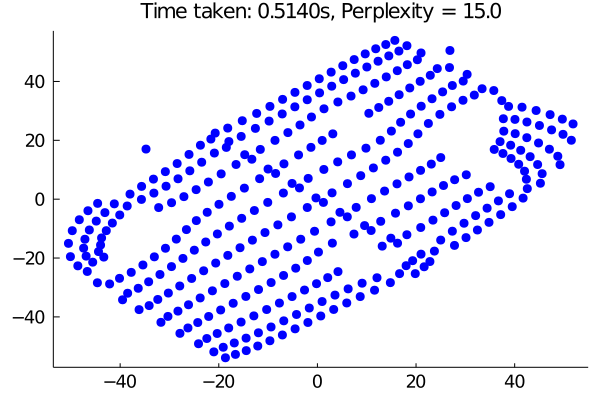

In [205]:
tsne_outdim = 2; 
    tsne_reducedim = 0; 
    tsne_maxiter = 1000;
tsne_perplexity = 15.0;
    Y = TSne.tsne(Scurve,tsne_outdim, tsne_reducedim, tsne_maxiter, tsne_perplexity);
    tSNEplot = scatter(Y[:,1], Y[:,2],gridalpha = 0.0,
        title = string("Time taken: 0.5140s, Perplexity = 15.0"),
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        markercolor = :blue)


### Diffusion Maps

In [55]:
function DiffusionMaps(X::Array{Float64,2}, 
        ϵ::Float64, 
        autotune::Bool = false, 
        δ = 1e-2, dim::Int64=3, t::Float64=1.0, α::Float64=0.0)
    #Inputs
    #X--data matrix (each row is a data point)
    #ϵ--affinity parameter
    #desired dimension embedding
    #t--scale parameter
    #α--distribution tuning
    

    n = size(X)[1]
    K = Array{Float64, 2}(undef, n,n);
    Δ = Array{Float64, 2}(undef, n,n);
    
    if autotune 
        for i = 1:n
            for j = 1:n
                Δ[i,j] = norm(X[i,:]- X[j,:]); 
            end
        end

        Δ = Δ - diagm(diag(Δ)); 
        rowmins = Array{Float64,1}(undef, n); 
        for i = 1:n 
            rowmins[i] = sort(Δ[i,:])[2]; 
        end

        ϵ = 2*mean(rowmins);
    end
    
    for i in 1:n
        for j in 1:n
            Δ[i,j] = norm(X[i,:] - X[j,:]);
            K[i,j] = exp(-(Δ[i,j])^2 / ϵ);
        end
    end
    
    q = K*ones(n,1); 
    Q = diagm(q[:,1]); 
    K_α = (Q^(-α))*K*(Q^(-α));
    
    d_α = K_α*ones(n,1); 
    D_α = sum(d_α);
    Π = (1/D_α)*diagm(d_α[:,1]); 
    S = (Π^(-1/2))*K_α*(Π^(-1/2));
    time = @elapsed SVD = svd(S, full = false); 
    V = SVD.U; 
    R = (Π^(-1/2))*V; 
    Λ = diagm(SVD.S); 
    
    if autotune 
        λ = SVD.S; 
        t = ceil(log(δ)/(log(λ[dim+1]) - log(λ[1])))
    end
    
    Λ_tα = Λ^(t-t*α)
    Ψ = R[:,2:dim+1]*Λ_tα[2:dim+1,2:dim+1]
    return Float64.(Ψ'), time, ϵ, t
end


DiffusionMaps (generic function with 6 methods)

In [56]:
Ψ, time, ϵ, t = DiffusionMaps(Scurve, 1.0, true);

In [57]:
ϵ

0.5866292439008628

In [58]:
t

52.0

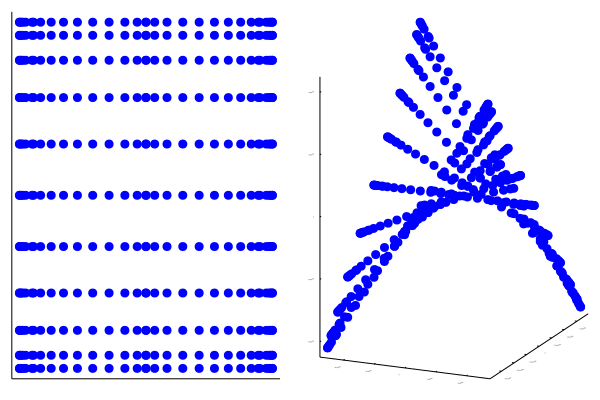

In [107]:
ScurveDM_2 = scatter(Ψ[1,:],Ψ[2,:],gridalpha = 0.0,
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        xticks = false,
        yticks = false,
        markercolor = :blue)
ScurveDM_3 = scatter(Ψ[1,:],Ψ[2,:],Ψ[3,:],
        gridalpha = 0.0,
        tickfontsize = 1, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        #tickfontcolor = "white",
        markercolor = :blue)
Scurve_DM = plot(ScurveDM_2, ScurveDM_3, layout = 2, 
    plot_title = string("t = ", string(t),", δ = ", string(δ), ", ϵ = ", string(ϵ)))

## Noisy S-Curve 

### PCA

In [79]:
savefig(PCAplot_SN, "SN3_PCA");
# savefig(ISOplot_SN, "SN_ISO");
# savefig(tSNESN, "SN_tSNE");
# savefig(ScurveN_DM, "SN_DM");

In [ ]:
## PCA Classification 


#Normalizing S-curve data: 
Y = ScurveNoisy - (1/size(ScurveNoisy)[1])*ones(size(ScurveNoisy)[1],1)*ones(1,size(ScurveNoisy)[1])*ScurveNoisy;

#Computing the SVD
t = @elapsed SVD = svd(Y, full = false);

#Computing the PCA
U = SVD.U; 
Σ = diagm(SVD.S); 
PCA = U[:,1:3]*Σ[1:3,1:3];

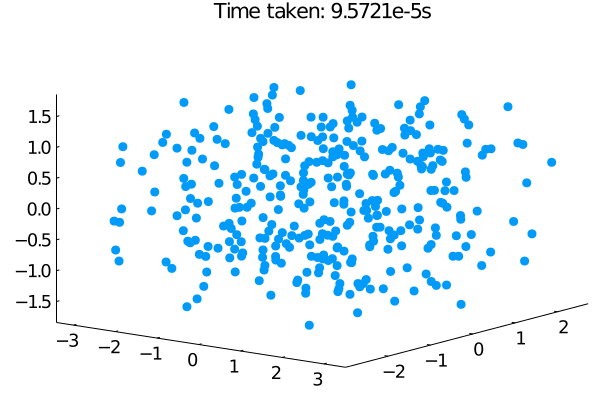

In [78]:
PCAplot_SN = scatter(PCA[:,1],PCA[:,2], PCA[:,3],
    markershape = :circle,
    title = string("Time taken: ", string(t),"s"),
    markersize = 5, 
    legend = false, 
    gridalpha = 0.0,
    markerstrokewidth = 0,
    camera = [40,40],
    tickfontsize = 12)
    #xlabel = "First Principal Component", ylabel = "Second Principal Component")

### Isomap

In [114]:
t = @elapsed begin 
    Model = fit(Isomap, ScurveNoisy'; k=10, maxoutdim = 3, nntype = ManifoldLearning.BruteForce)
end

0.233238509

In [115]:
Embedding = ManifoldLearning.transform(Model)

3×352 Array{Float64,2}:
 2.80819   2.19042   2.46631   2.27467   …  -2.19251  -2.82406  -2.34343
 0.940537  2.18539   1.98807   2.18631      -2.11301  -1.38691  -1.16759
 1.25168   0.394575  0.896355  0.372549     -1.8518   -1.52805  -0.69894

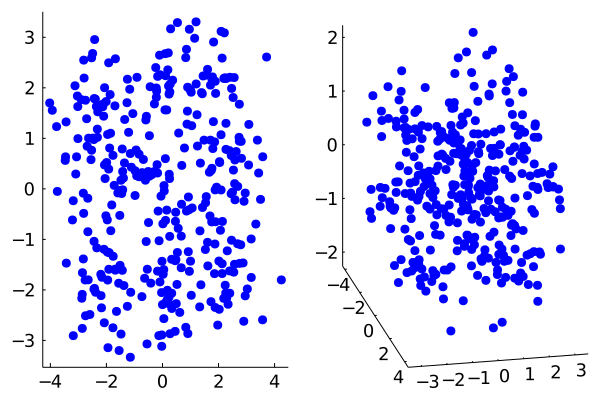

In [127]:
ISOplot_SN_2 = scatter(Embedding[1,:], Embedding[2,:],
        gridalpha = 0.0,
        #title = string("Time taken: ",string(t),"s"),
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        markercolor = :blue)
ISOplot_SN_3 = scatter(Embedding[1,:], Embedding[2,:], Embedding[3,:],
        gridalpha = 0.0,
        #title = string("Time taken: ",string(t),"s"),
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0, 
        camera = [70,40],
        markercolor = :blue)
ISOplot_SN = plot(ISOplot_SN_2, ISOplot_SN_3, layout = 2)

### LLE 

In [347]:
LLE_Model = ManifoldLearning.fit(LLE, ScurveNoisy'; k = 13, maxoutdim = 3, nntype = ManifoldLearning.BruteForce,
            tol = 1e-3)

┌ Warning: k > maxoutdim: regularization will be used
└ @ ManifoldLearning /Users/shashanksule/.julia/packages/ManifoldLearning/vRIIU/src/lle.jl:70


LLE(outdim = 3, neighbors = 13)

In [348]:
LLE_embedding = ManifoldLearning.transform(LLE_Model)

3×352 Transpose{Float64,Array{Float64,2}}:
 -2.47831      0.856049      0.0302152    …   -8.29589e-5  -6.37277e-6
  0.030889     0.0236395     0.0224609        -1.75046e-5  -1.64673e-6
  0.000944672  0.000367746  -0.000922023     -13.507       -0.357176

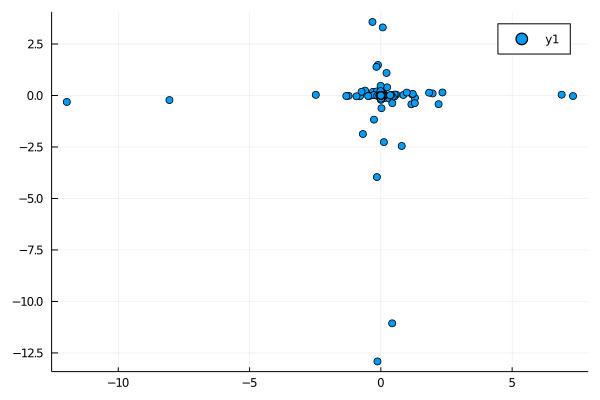

In [349]:
scatter(LLE_embedding[1,:], LLE_embedding[2,:])

### t-SNE

In [152]:
tSNESNplots = Any[]; 
ScurveNoisy = [ScurveNoisy zeros(352,1)];
tsne_outdim = 3; 
tsne_reducedim = 0; 
tsne_maxiter = 500;
for i in [5.0, 10.0, 25.0, 40.0]
    tsne_perplexity = 25.0;
    Y = TSne.tsne(ScurveNoisy,tsne_outdim, tsne_reducedim, tsne_maxiter, tsne_perplexity)
    push!(tSNESNplots, scatter(Y[:,1], Y[:,2], Y[:,3],
        gridalpha = 0.0,
        title = string("Perplexity: ",string(i)),
        tickfontsize = 1, 
        legend = false,
        markersize = 2,
        markerstrokewidth = 0, 
        #camera = [70,40],
        markercolor = :blue));
end

tSNESN = plot(tSNESNplots[1], tSNESNplots[2], tSNESNplots[3], tSNESNplots[4], layout = 4);

Computing t-SNE 35%|████████████▌                       |  ETA: 0:00:00
4m  KL_divergence:  2.6056 (warmup)
Computing t-SNE 65%|███████████████████████▌            |  ETA: 0:00:00
4m  KL_divergence:  1.2660
Computing t-SNE 90%|████████████████████████████████▌   |  ETA: 0:00:00
4m  KL_divergence:  0.4949
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.4827
Computing t-SNE 23%|████████▏                           |  ETA: 0:00:00
4m  KL_divergence:  2.6282 (warmup)
Computing t-SNE 39%|██████████████                      |  ETA: 0:00:00
4m  KL_divergence:  2.6425 (warmup)
Computing t-SNE 55%|███████████████████▊                |  ETA: 0:00:00
4m  KL_divergence:  2.2899
Computing t-SNE 84%|██████████████████████████████▎     |  ETA: 0:00:00
4m  KL_divergence:  0.4919
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.4795
Computing t-SNE 22%|████████                            |  ETA: 0:00:00
4m  KL_diverge

### Diffusion Maps

In [68]:
V, time, ϵ, t = DiffusionMaps(ScurveNoisy, 1.0, true)

([3.905577037843715e125 4.0539029276474e125 … -4.387534165977902e125 -5.097642101466272e125; -2.185936303963198e125 -1.142722515735964e125 … 7.607765522319401e124 1.778387063312944e125; 5.924557331396792e124 4.392446749330301e124 … 1.5043901905675778e124 3.6943368173614297e124], 0.045223334, 0.7290163618147989, 35.0)

In [69]:
ϵ

0.7290163618147989

In [70]:
t

35.0

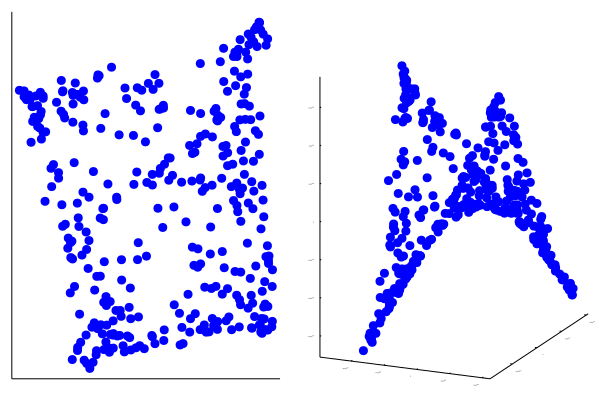

In [71]:
ScurveNDM_2 = scatter(V[1,:],V[2,:],gridalpha = 0.0,
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        xticks = false,
        yticks = false,
        markercolor = :blue)
ScurveNDM_3 = scatter(V[1,:],V[2,:],V[3,:],
        gridalpha = 0.0,
        tickfontsize = 1, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0,
        #tickfontcolor = "white",
        markercolor = :blue)
ScurveN_DM = plot(ScurveNDM_2, ScurveNDM_3, layout = 2) 
    #plot_title = string("t = ", string(t),", δ = ", string(δ), ", ϵ = ", string(ϵ)))

# Images 

In [100]:
# savefig(PCAplot_Faces, "F_PCA");
 savefig(ISO_Faces, "F_ISO");
# savefig(Faces_tsne, "F_tSNE");
# savefig(Faces_DM, "F_DM");

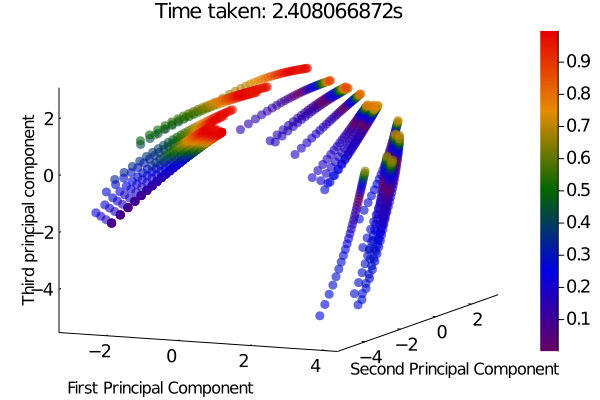

In [211]:
## PCA Classification 


#Normalizing S-curve data: 
Y = Faces - (1/size(Faces)[1])*ones(size(Faces)[1],1)*ones(1,size(Faces)[1])*Faces;

#Computing the SVD
t = @elapsed SVD = svd(Y, full = false);

#Computing the PCA
U = SVD.U; 
Σ = diagm(SVD.S); 
PCA = U[:,1:3]*Σ[1:3,1:3];
PCAplot_Faces = scatter(PCA[:,1],PCA[:,2], PCA[:,3],
    markershape = :circle,
    title = string("Time taken: ", string(t),"s"),
    markersize = 5, 
    legend = false, 
    gridalpha = 0.0,
    markerstrokewidth = 0,
    tickfontsize = 12,
    color = :darkrainbow,
    marker_z = colours,
    markeralpha = 0.6,
    colorbar = true,
    xlabel = "First Principal Component", ylabel = "Second Principal Component", zlabel = "Third principal component")

In [97]:
t = @elapsed Model = fit(Isomap, Faces'; k=32, maxoutdim = 3, nntype = ManifoldLearning.BruteForce);
Embedding = ManifoldLearning.transform(Model)

3×1024 Array{Float64,2}:
 13.8958    13.1289     12.7764    …  -2.38864   -1.71219   -0.0175061
 -1.36676    0.522051    0.939662     -1.43749   -1.31285   -0.977606
  0.822519   0.0927099  -0.221664      0.314313   0.412292   0.626101

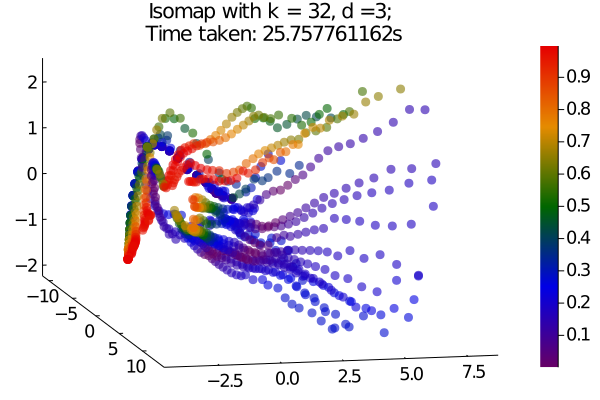

In [99]:
ISO_Faces = scatter(Embedding[1,:], Embedding[2,:], Embedding[3,:],
        gridalpha = 0.0,
        title = string("Isomap with k = 32, d =3;\n Time taken: ",string(t),"s"),
        tickfontsize = 12, 
        legend = false,
        markersize = 5,
        markerstrokewidth = 0, 
        camera = [70,40],
        marker_z = colours,
        colorbar = true,
        markeralpha = 0.6,
        color = :darkrainbow)

### LLE 

In [274]:
LLE_Model = fit(LLE, Faces'; k = 15, maxoutdim = 3)

┌ Warning: k > maxoutdim: regularization will be used
└ @ ManifoldLearning /Users/shashanksule/.julia/packages/ManifoldLearning/vRIIU/src/lle.jl:70


LLE(outdim = 3, neighbors = 15)

In [275]:
LLE_embedding = ManifoldLearning.transform(LLE_Model)

3×1024 Transpose{Float64,Array{Float64,2}}:
  8.99014e-5   -2.28471e-6    0.000227999  …   5.84025e-8   9.54381e-8
 -2.18767e-11   5.20909e-12  -4.82891e-11     -5.75171e-10  0.231818
  1.76015e-8    9.8089e-9     4.01081e-8       7.90164e-12  6.26288e-12

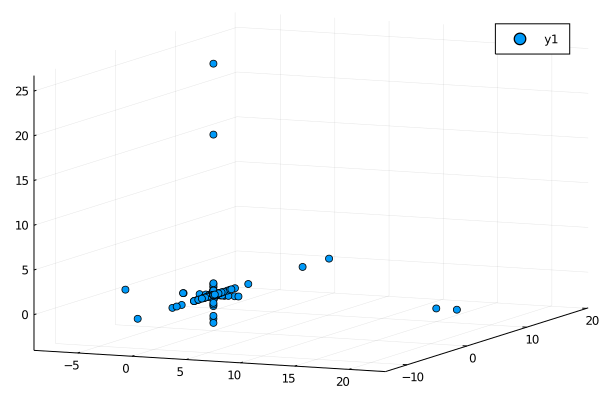

In [277]:
scatter(LLE_embedding[1,:], LLE_embedding[2,:], LLE_embedding[3,:])

### t-SNE

In [193]:
tsne_outdim = 3; 
tsne_reducedim = 0; 
tsne_maxiter = 500;
tsne_perplexity = 35.0;
Y = TSne.tsne(Faces,tsne_outdim, tsne_reducedim, tsne_maxiter, tsne_perplexity)

Computing point perplexities100%|███████████████████████| Time: 0:00:00
Computing t-SNE  3%|█                                   |  ETA: 0:00:04
4m  KL_divergence:  3.5472 (warmup)
Computing t-SNE  5%|█▉                                  |  ETA: 0:00:04
4m  KL_divergence:  2.4091 (warmup)
Computing t-SNE  7%|██▋                                 |  ETA: 0:00:04
4m  KL_divergence:  2.4091 (warmup)
Computing t-SNE 10%|███▋                                |  ETA: 0:00:04
4m  KL_divergence:  2.0488 (warmup)
Computing t-SNE 13%|████▋                               |  ETA: 0:00:04
4m  KL_divergence:  2.0488 (warmup)
Computing t-SNE 15%|█████▌                              |  ETA: 0:00:03
4m  KL_divergence:  1.9564 (warmup)
Computing t-SNE 18%|██████▍                             |  ETA: 0:00:03
4m  KL_divergence:  1.9564 (warmup)
Computing t-SNE 20%|███████▎                            |  ETA: 0:00:03
4m  KL_divergence:  1.9215 (warmup)
Computing t-SNE 23%|████████▎                           |  ETA: 

1024×3 Array{Float64,2}:
  13.7161      32.5308    -0.220955
  11.7765      30.1137    -1.12402
  10.9936      29.1562    -1.10006
  10.3946      28.5702    -0.852771
   0.448215    23.78      -2.43025
  -0.0785286   23.3576    -2.66023
  -0.469398    23.2961    -2.74118
  -2.6305      22.201     -2.73826
  -9.63225     14.9122   -13.5414
  -9.87198     14.8607   -13.9813
 -10.0443      14.3344   -14.0939
 -10.3408      13.9974   -14.3333
 -14.2238       5.47496  -18.1838
   ⋮                     
   8.58428    -13.154     22.867
   8.90464    -13.5703    22.4579
   9.00718    -13.754     23.0161
   9.25974    -13.632     21.1603
  10.1656     -14.2436    18.8836
  10.369      -14.5247    17.9611
   5.9394     -18.2334    10.873
   5.20273    -18.5914    10.4086
 -19.1227     -27.9527    -0.18121
 -19.4719     -27.2896    -0.384692
 -20.0961     -26.464     -1.11969
 -23.2852     -12.5439   -10.6699

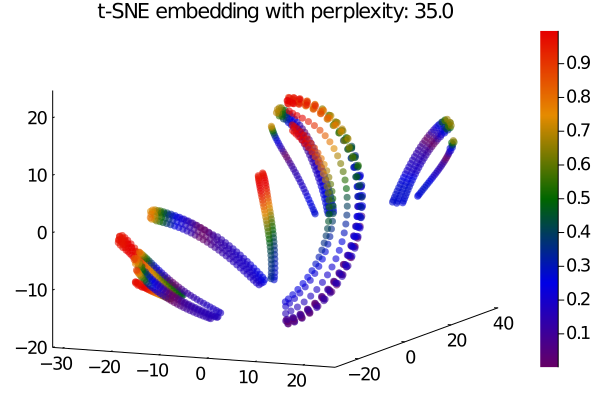

In [195]:
Faces_tsne = scatter(Y[:,1], Y[:,2], Y[:,3],
        gridalpha = 0.0,
        title = string("t-SNE embedding with perplexity: ",string(tsne_perplexity)),
        tickfontsize = 12, 
        legend = false,
        colorbar = true,
        #markersize = 2,
        markerstrokewidth = 0,
        marker_z = colours,
        markeralpha = 0.6,
        color = :darkrainbow)
        #xtickfont = 1,
        #ytickfont = 1,
        #ztickfont = 1,
        #camera = [70,40],

### Diffusion Maps 

In [91]:
Ψ, time, ϵ, t = DiffusionMaps(Faces, 10.0, false, 1e-2, 3, 1000.0, 1.0)

([1.958542551349024 1.957532641691452 … -0.528338071926961 -0.11765329252296669; -1.8618014013519386 -1.3560623080918321 … -0.5011584576229965 -0.28605891612732914; 4.092296091743318 3.61411772501643 … -0.7476090468688014 -1.1197494059115234], 0.827002659, 10.0, 1000.0)

In [84]:
ϵ

0.3872887631049094

In [85]:
t

1161.0

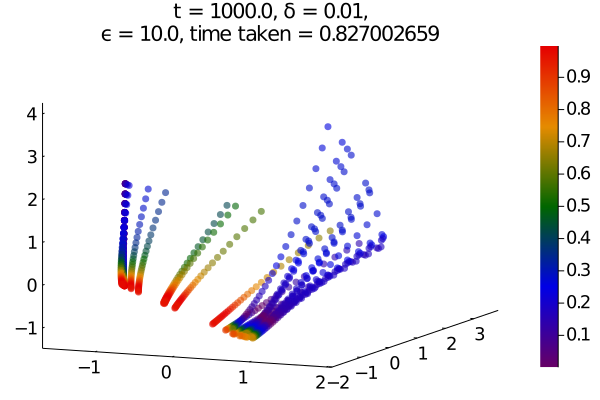

In [93]:
Faces_DM = scatter(Ψ[1,:], Ψ[2,:], Ψ[3,:], 
    gridalpha = 0.0,
    title = string("t = ", string(t),", δ = 0.01,\n", "ϵ = ", string(ϵ), ", time taken = ",string(time)),
    tickfontsize = 12, 
    legend = false,
    colorbar = true,
    #markersize = 2,
    markerstrokewidth = 0,
    marker_z = colours,
    markeralpha = 0.6,
    color = :darkrainbow)